# Convulational Neural Network in Keras

Verifying and fine tuning parameters of CNN to be used on "Smiley" dataset for classification.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import math
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras

In [2]:
def check_accuracy(y_pred, Y_test):
    
    
    class_tree = accuracy_score(y_pred, Y_test)
    
    print("Accuracy: {:.2f}%".format(class_tree*100))

    confusion_matrix_1 = confusion_matrix(Y_test, y_pred)

    my_matrix = sns.heatmap(confusion_matrix_1, annot=True, cmap='Blues')
    my_matrix.set_title('Accuracy');
    my_matrix.set_xlabel('\nPredicted Values')
    my_matrix.set_ylabel('Actual Values ');
    my_matrix.xaxis.set_ticklabels(['False','True'])
    my_matrix.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Displaying the
    print(confusion_matrix(Y_test, y_pred))
    print("\n")
    print(classification_report(Y_test, y_pred))
    print(roc_auc_score(Y_test, y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
    display.plot()
    plt.show()


In [5]:
# Reshape X into 2D array and split into train & test sets
#X_train, X_test, Y_train, Y_test = train_test_split(np.reshape(X,(144,81)), Y,test_size=0.2,random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)


##########################################################################################
# For use in later parts which require 30% and 60% reduction in training set
##########################################################################################

# Add 30% os original training set into test set 
X_train_extract30, X_temp_extra_30, Y_train_extract30, Y_temp_extra_30 = train_test_split(X_train,Y_train ,test_size=0.3,random_state=0)

# The original training set is now reduced and held in X_train_extract30 Y_train_extract30
X_test_extra_30 = np.append(X_test, X_temp_extra_30, axis=0)
Y_test_extra_30 = np.append(Y_test, Y_temp_extra_30, axis=0)


# Add 60% os original training set into test set 
X_train_extract60, X_temp_extra_60, Y_train_extract60, Y_temp_extra_60 = train_test_split(X_train,Y_train ,test_size=0.6,random_state=0)
# The original training set is now reduced and held in X_train_extract60 Y_train_extract60
X_test_extra_60 = np.append(X_test, X_temp_extra_60, axis=0)
Y_test_extra_60 = np.append(Y_test, Y_temp_extra_60, axis=0)


In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
____________________________________________________

In [11]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 4ms/step - loss: 2.1374 - accuracy: 0.3565
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 1.5265 - accuracy: 0.4957
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 1.0568 - accuracy: 0.4957
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.7652
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.9217


In [12]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)
batch_size = 10
no_epochs=10
verbosity=1
learning_rate=0.01
#loss_function = sparse_categorical_crossentropy
# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
# K-fold Cross Validation model evaluation
fold_no = 1

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):
  # Define the model architecture
   
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9,1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
  

  # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    model.fit(inputs[train], targets[train], epochs=5)
   


  # Increase fold number
    fold_no = fold_no + 1



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               73856     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
__________________________________________________

                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/5
5/5 [==============================] - 0s 3ms/step - loss: 2.0692 - accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 1.4352 - accuracy: 0.9000
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.9077
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.9077
Epoch 5/5
5/5 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.9077


4/4 [==============================] - 0s 2ms/step




Accuracy: 92.17%


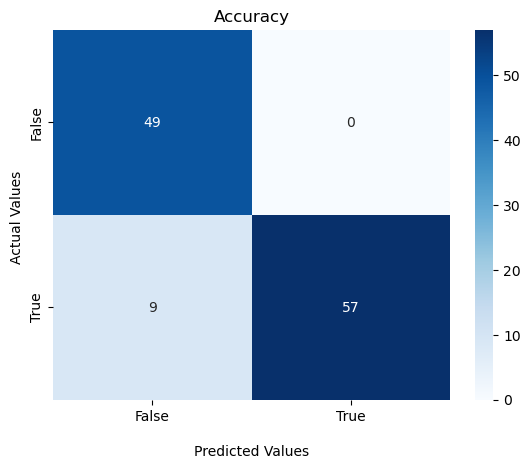

[[49  0]
 [ 9 57]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.92        49
           1       1.00      0.86      0.93        66

    accuracy                           0.92       115
   macro avg       0.92      0.93      0.92       115
weighted avg       0.93      0.92      0.92       115

0.9318181818181819


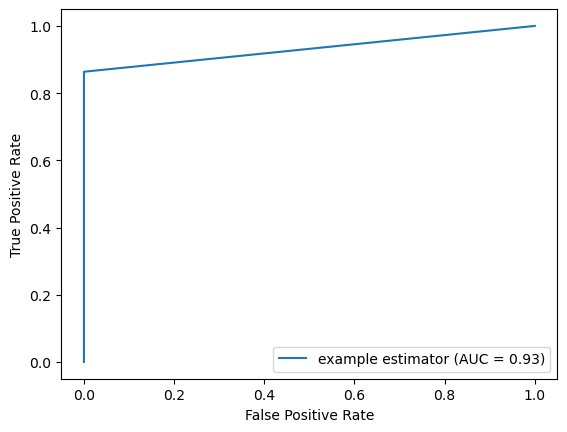

1/1 [==============================] - 0s 21ms/step




Accuracy: 89.66%


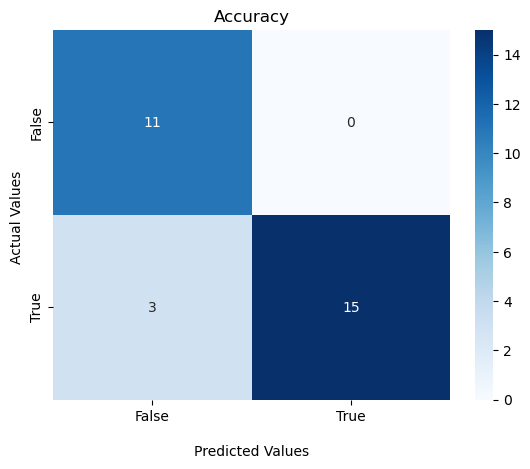

[[11  0]
 [ 3 15]]


              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.83      0.91        18

    accuracy                           0.90        29
   macro avg       0.89      0.92      0.89        29
weighted avg       0.92      0.90      0.90        29

0.9166666666666667


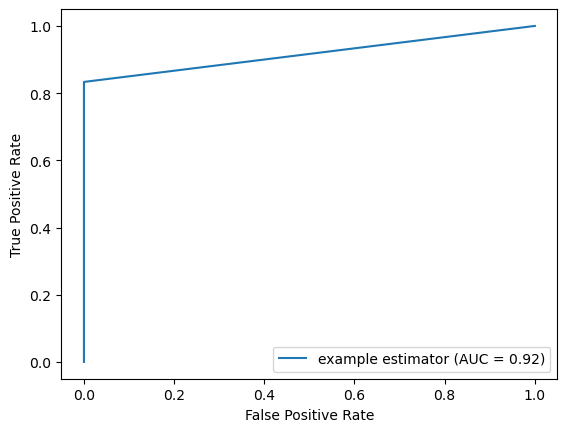

In [13]:
y_pred = np.argmax(model.predict(X_train), axis=-1)
confusion_matrix_1 = check_accuracy(Y_train, y_pred)
y_pred = np.argmax(model.predict(X_test), axis=-1)
confusion_matrix_1 = check_accuracy(Y_test, y_pred)


In [14]:
def ten_fold(learning_rate,batch_size, layer_structure, X_train,X_test, Y_train,Y_test ):
    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((Y_train, Y_test), axis=0)
    batch_size = batch_size
    no_epochs=10
    verbosity=0
    learning_rate=learning_rate
    #loss_function = sparse_categorical_crossentropy
    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=10, shuffle=True)

    # K-fold Cross Validation model evaluation
    fold_no = 1
    # K-fold Cross Validation model evaluation
    fold_no = 1

    # Define per-fold score containers
    acc_per_fold = []
    loss_per_fold = []
    for train, test in kfold.split(inputs, targets):
      # Define the model architecture

        model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9,1)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()
    


      # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

      # Fit data to model
        history = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  epochs=no_epochs,
                  verbose=verbosity)

      # Generate generalization metrics
        scores = model.evaluate(inputs[test], targets[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

      # Increase fold number
        fold_no = fold_no + 1
    y_pred = np.argmax(model.predict(X_train), axis=-1)
    confusion_matrix_1 = check_accuracy(Y_train, y_pred)
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    confusion_matrix_1 = check_accuracy(Y_test, y_pred)        

    return model 


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               73856     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________

Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 6: loss of 0.03218790888786316; accuracy of 100.0%
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 576)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               73856     
                  

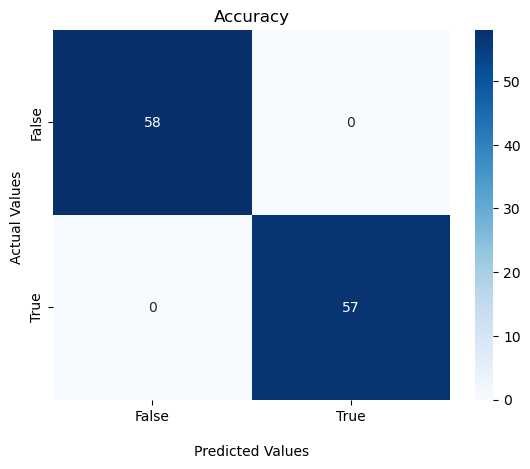

[[58  0]
 [ 0 57]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        57

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

1.0


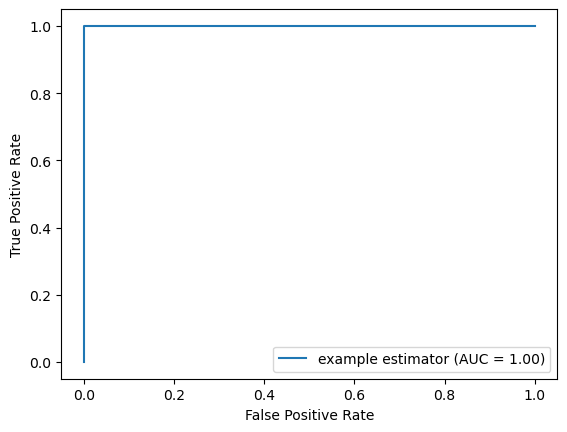

1/1 [==============================] - 0s 24ms/step




Accuracy: 100.00%


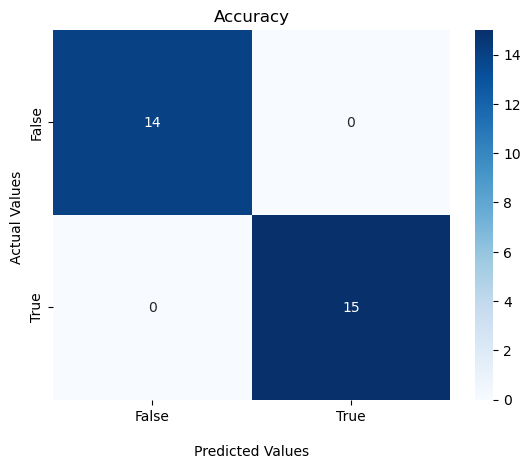

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


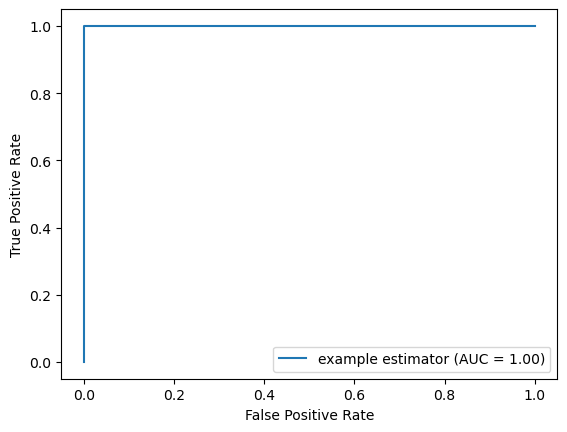

In [15]:
new_model = ten_fold(.001, 10, [5,3,2], X_train,X_test, Y_train,Y_test)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 576)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               73856     
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________

 max_pooling2d_27 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 576)               0         
                                                                 
 dense_54 (Dense)            (None, 128)               73856     
                                                                 
 dense_55 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss of 0.005352076608687639; accuracy of 100.0%
Model: "sequential_28"
_________________________________________________________________
 Layer (type)    

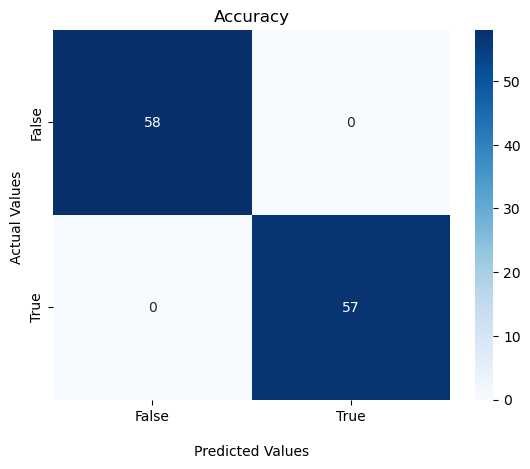

[[58  0]
 [ 0 57]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        57

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

1.0


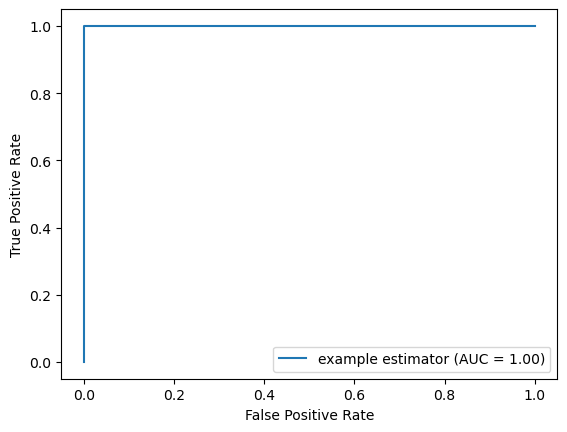

1/1 [==============================] - 0s 22ms/step




Accuracy: 100.00%


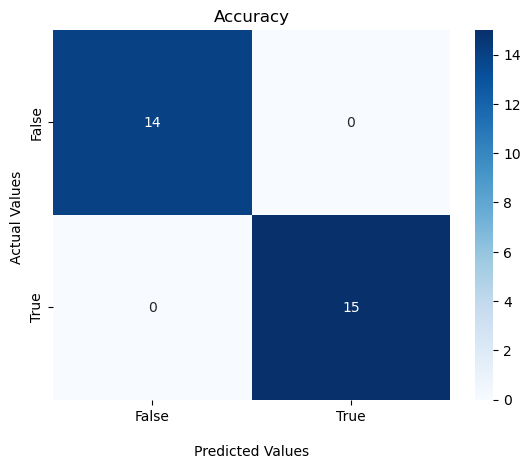

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


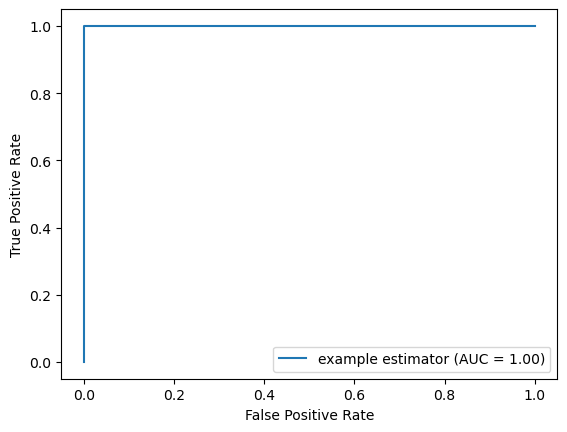

In [16]:
new_model = ten_fold(.1, 10, [5,3,2], X_train,X_test, Y_train,Y_test)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_31 (Flatten)        (None, 576)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               73856     
                                                                 
 dense_63 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________

 max_pooling2d_37 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_37 (Flatten)        (None, 576)               0         
                                                                 
 dense_74 (Dense)            (None, 128)               73856     
                                                                 
 dense_75 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss of 0.012263097800314426; accuracy of 100.0%
Model: "sequential_38"
_________________________________________________________________
 Layer (type)    

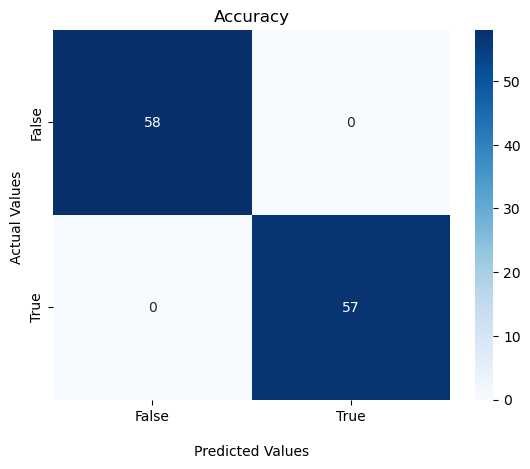

[[58  0]
 [ 0 57]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        57

    accuracy                           1.00       115
   macro avg       1.00      1.00      1.00       115
weighted avg       1.00      1.00      1.00       115

1.0


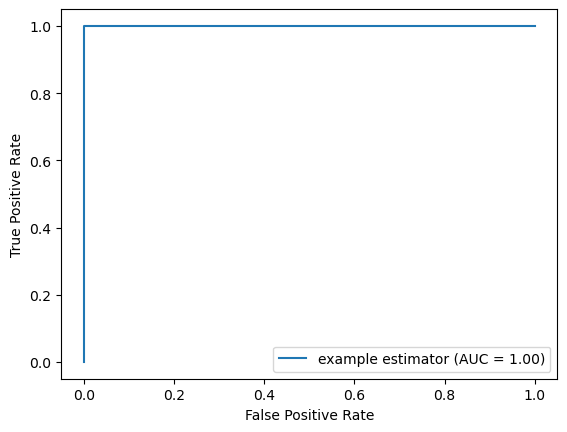

1/1 [==============================] - 0s 20ms/step




Accuracy: 100.00%


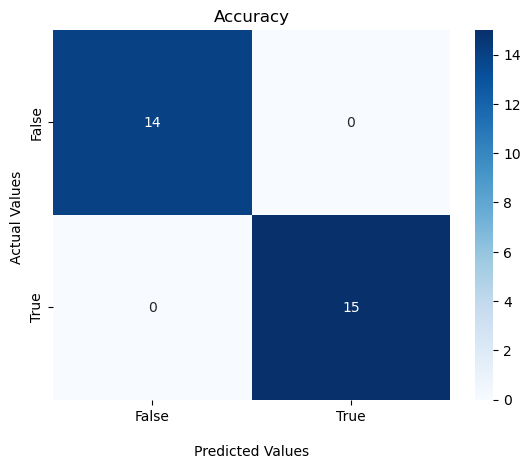

[[14  0]
 [ 0 15]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

1.0


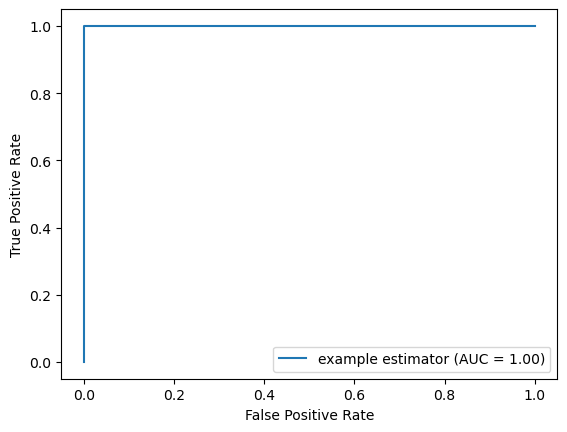

In [17]:
new_model = ten_fold(.001, 10, [100,80,2], X_train,X_test, Y_train,Y_test)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_41 (Flatten)        (None, 576)               0         
                                                                 
 dense_82 (Dense)            (None, 128)               73856     
                                                                 
 dense_83 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________

 max_pooling2d_47 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 576)               0         
                                                                 
 dense_94 (Dense)            (None, 128)               73856     
                                                                 
 dense_95 (Dense)            (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss of 0.023664791136980057; accuracy of 100.0%
Model: "sequential_48"
_________________________________________________________________
 Layer (type)    

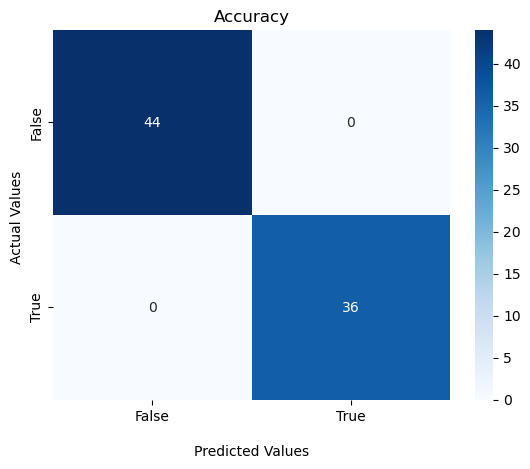

[[44  0]
 [ 0 36]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        36

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


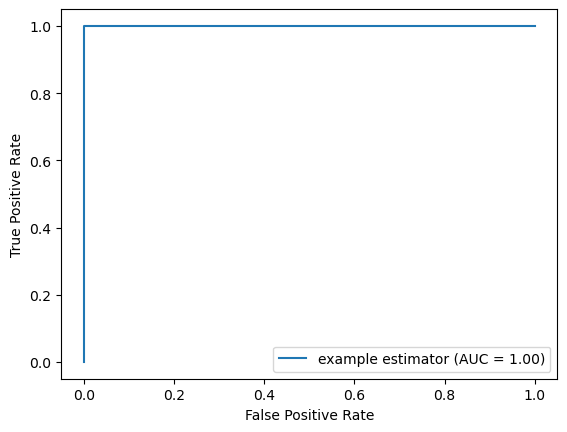

2/2 [==============================] - 0s 4ms/step




Accuracy: 100.00%


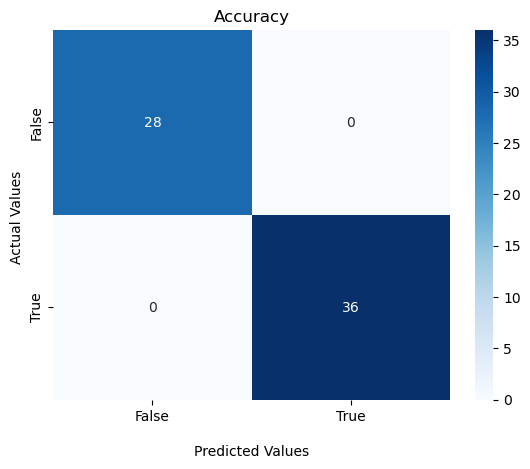

[[28  0]
 [ 0 36]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        36

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

1.0


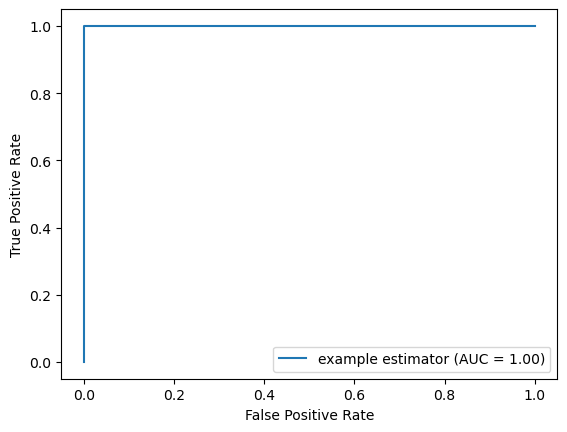

In [18]:
    new_model = ten_fold(.1, 10, [5,3,2], X_train_extract30, X_test_extra_30, Y_train_extract30, Y_test_extra_30)

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_51 (Flatten)        (None, 576)               0         
                                                                 
 dense_102 (Dense)           (None, 128)               73856     
                                                                 
 dense_103 (Dense)           (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________

 max_pooling2d_57 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_57 (Flatten)        (None, 576)               0         
                                                                 
 dense_114 (Dense)           (None, 128)               73856     
                                                                 
 dense_115 (Dense)           (None, 10)                1290      
                                                                 
Total params: 75,786
Trainable params: 75,786
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 7: loss of 0.023439984768629074; accuracy of 100.0%
Model: "sequential_58"
_________________________________________________________________
 Layer (type)    

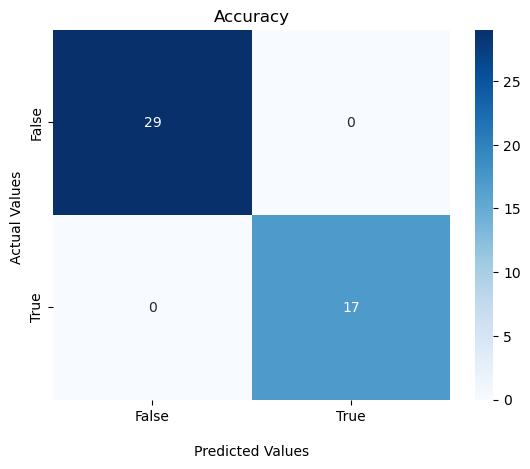

[[29  0]
 [ 0 17]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        17

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

1.0


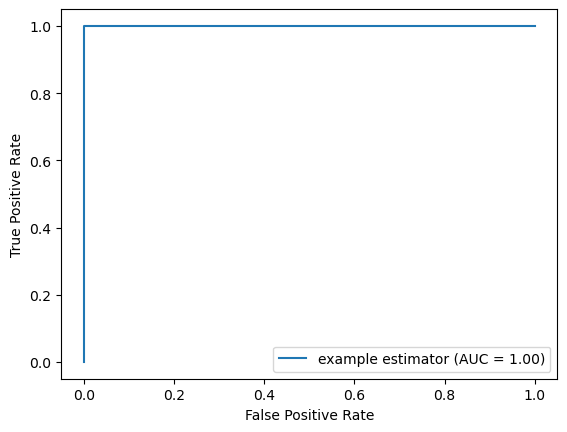

4/4 [==============================] - 0s 2ms/step




Accuracy: 100.00%


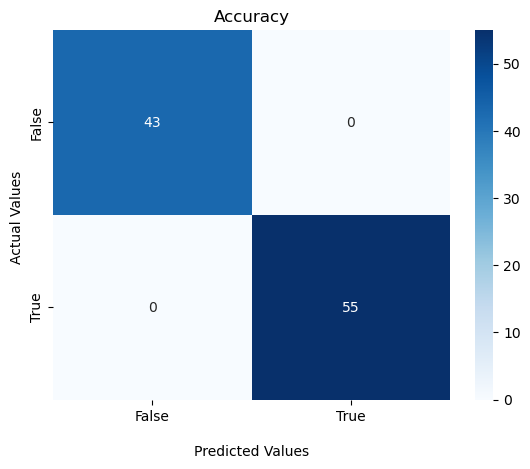

[[43  0]
 [ 0 55]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        55

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98

1.0


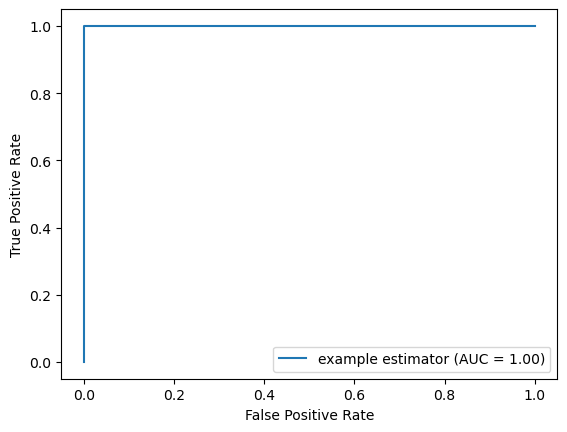

In [19]:
new_model = ten_fold(.1, 10, [5,3,2], X_train_extract60,X_test_extra_60, Y_train_extract60,Y_test_extra_60)

